In [11]:
import sys
sys.path.append(r'F:\\zhulin\\monsh\\paper-anti-CRISPR\\latex\\outcomes\\vot_outcome\\anti_CRISPR\\code')
import data ### read data from data.py
import premodel ### PreAcrs model
import pandas as pd

In [12]:
train_data,test_data=data.get_data() ###import testing data and training data
featurename=['PSSM_AC','RPSSM','SSA']###the names of three features
y_proba_valid_all,y_verified_valid_all,test_pred_score=premodel.get_result(train_data,test_data) ###import PreAcrs results


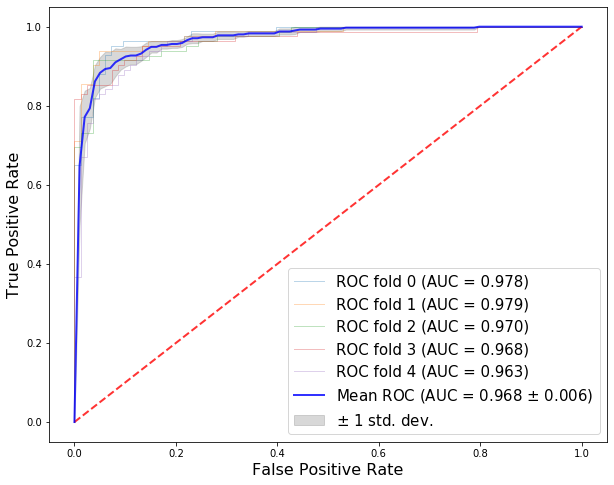

In [71]:
premodel.ROC_5_fold(y_proba_valid_all,y_verified_valid_all)


In [41]:
#metrics ['PRE','SN','SP','F_score','ACC','MCC','AUC']
validation_perfromance=premodel.metrix(y_proba_valid_all,y_verified_valid_all)
validation_perfromance

,category,PRE,SN,SP,F_score,ACC,MCC,AUC
0,fold1,0.957746,0.819277,0.963855,0.883117,0.891566,0.791448,0.977936
1,fold2,0.985075,0.795181,0.987952,0.880000,0.891566,0.798102,0.979097
2,fold3,0.967742,0.731707,0.975610,0.833333,0.853659,0.729343,0.969810
3,fold4,0.971831,0.841463,0.975610,0.901961,0.908537,0.824526,0.968174
4,fold5,0.968750,0.756098,0.975610,0.849315,0.865854,0.750000,0.963117
5,mean,0.970229,0.788745,0.975727,0.869545,0.882236,0.778684,0.968070
6,std,0.008799,0.040180,0.007621,0.024758,0.019753,0.034347,0.006054


In [43]:

##the performance of the testing dataset
#metrics ['PRE','SN','SP','F_score','ACC','MCC','AUC']
pred_test=pd.DataFrame({'Predict score':test_pred_score,'Verified':test_data[0].iloc[:,0]}).reset_index(drop=True)
pred_test

,Predict score,Verified
0,0.679400,1
1,0.357199,1
2,0.535966,1
3,0.637565,1
4,0.597570,1
...,...,...
347,0.105767,0
348,0.170294,0
349,0.227637,0
350,0.460311,0


In [50]:
test_performance1=premodel.performance(test_pred_score,test_data[0].iloc[:,0])
test_performance=pd.DataFrame(columns=['PRE','SN','SP','F_score','ACC','MCC','AUC'])
test_performance.loc[0]=test_performance1
test_performance

,PRE,SN,SP,F_score,ACC,MCC,AUC
0,0.978873,0.789773,0.982955,0.874214,0.886364,0.787563,0.970913


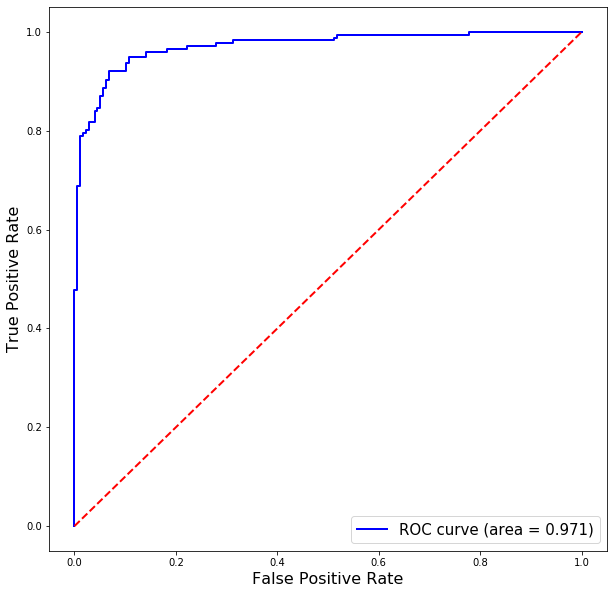

In [63]:
##ROC image:
premodel.auc_pred(list(test_pred_score),list(test_data[0].iloc[:,0]))